# Lab 3 - K-means and PCA
(principle component analysis)

In [1]:
# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import seaborn
import seaborn as sns
%matplotlib inline

# Apply the default theme
sns.set_theme()

## Step 1 - Dataset Understanding

Working with the Cleveland clinic testing dataset for diagnosing heart disease.

specifcally cleveland-testing.csv

In [5]:
c_t = pd.read_csv("cleveland-testing.csv")
c_t.head()

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True
3,44,False,atypical angina,120,263,False,normal,173,False,0,False
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False


In [6]:
print(f"Number of Rows: {len(c_t)}")
print(f"Shape (rows x cols): {c_t.shape}")

Number of Rows: 293
Shape (rows x cols): (293, 11)


In [7]:
c_t.dtypes

age                          int64
female                        bool
chest_pain                  object
rest_bps                     int64
cholesterol                  int64
high_fasting_blood_sugar      bool
rest_ecg                    object
maximum_heart_rate           int64
exercise_angina               bool
vessels                      int64
heart_disease                 bool
dtype: object

In [8]:
c_t.describe()

,age,rest_bps,cholesterol,maximum_heart_rate,vessels
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.365188,131.627986,246.522184,149.426621,0.658703
std,9.000747,17.750984,52.069603,22.877853,0.928746
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,55.000000,130.000000,241.000000,152.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,3.000000


## 1.1 Categorical Analysis

In [12]:
c_t['chest_pain'].value_counts()

asymptomatic        138
non-anginal pain     85
atypical angina      48
typical angina       22
Name: chest_pain, dtype: int64

In [10]:
c_t['rest_ecg'].value_counts()

normal              148
hypertrophy         141
wave abnormality      4
Name: rest_ecg, dtype: int64

In [11]:
c_t['heart_disease'].value_counts()

False    159
True     134
Name: heart_disease, dtype: int64

In [13]:
# three categorical against five numeric
# 'chest_pain', 'rest_ecg', 'heart_disease'
# 'age', 'rest_bps', 'cholesteral', 'maximum_heart_rate', 'vessels'

KeyError: 'cholesteral'

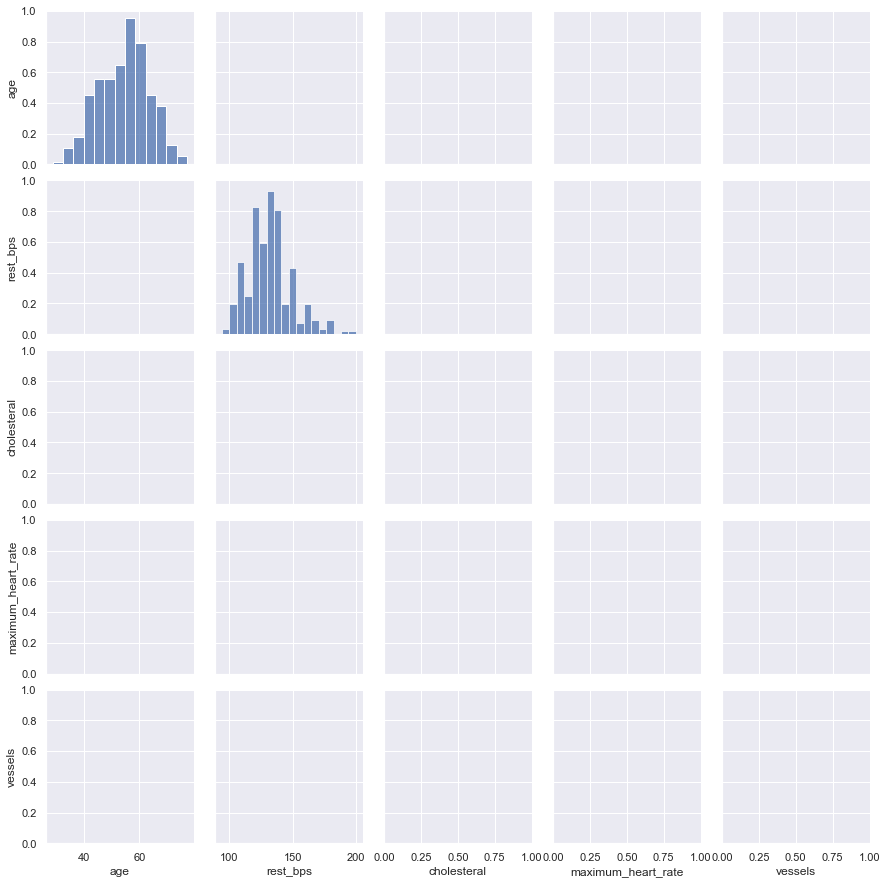

In [37]:
dis = ['chest_pain', 'rest_ecg', 'heart_disease']
dat = ['age', 'rest_bps', 'cholesteral', 'maximum_heart_rate', 'vessels']
sns.pairplot(c_t, vars= dat)


## Step 2 - K-means

In [ ]:
def kmeans_plot(df, cf=None):
    
    df_tmp = df.copy()
    df_tmp['centriod'] = False
    
    if cf is not None:
        cf_tmp = cf.copy()
        cf_tmp['centriod'] = True
    
    vf = pd.concat([df_tmp, cf_tmp]) if cf is not None else df_tmp
    
    # visualize demo + centriod data
    scatter = sns.relplot(
        data=vf, 
        x="x", 
        y="y",
        hue='cluster',
        style='centriod',
        kind="scatter",
        height=7,
        aspect=1.5,
        s=300
    ).set(
        title="Demo Data"
    )

    # label points with index
    for i, point in vf.iterrows():
        scatter.ax.text(point['x']+.1, point['y'], i)
        
kmeans_plot(demodf)

# cluster - this should be 0 or 1 and is the resulting labels from running K-Means.
# prediction - transformed 0s and 1s into True/False values that align with the ground truth heart_disease column.

## Step 3 - Confusion Matrix